In [1]:
import numpy as np # linear algebra
import  pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sn
warnings.filterwarnings("ignore")

In [2]:
train_df=pd.read_csv("/kaggle/input/google-stock-prices-training-and-test-data/Google_Stock_Price_Train.csv")
test_df=pd.read_csv("/kaggle/input/google-stock-prices-training-and-test-data/Google_Stock_Price_Test.csv")

In [3]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [5]:
train_df['Close']=train_df['Close'].str.replace(",","",regex=True)

In [6]:
train_df['Volume']=train_df['Volume'].str.replace(",","",regex=True)

In [7]:
train_df.info()
train_df['Close']=pd.to_numeric(train_df['Close'])
train_df['Volume']=pd.to_numeric(train_df['Volume'],errors="coerce")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [8]:
train_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,623400
1254,12/27/2016,790.68,797.86,787.66,791.55,789100
1255,12/28/2016,793.70,794.23,783.20,785.05,1153800
1256,12/29/2016,783.33,785.93,778.92,782.79,744300


In [9]:
train_df.set_index("Date",drop=True,inplace=True)  

In [10]:
train_df.index=pd.to_datetime(train_df.index)

In [11]:
pd.options.display.float_format = '{:,.2f}'.format
train_df.loc["2014-03-30":].describe()

,Open,High,Low,Close,Volume
count,696.00,696.00,696.00,696.00,696.00
mean,639.90,645.00,634.01,639.61,"1,936,032.04"
std,97.49,98.10,97.07,97.52,"1,008,537.60"
min,493.30,494.62,486.23,491.20,"7,900.00"
25%,542.03,547.87,538.50,542.46,"1,338,700.00"
50%,626.20,632.27,618.55,625.69,"1,698,150.00"
75%,733.01,741.48,729.12,736.09,"2,173,850.00"
max,816.68,816.68,805.14,813.11,"11,164,900.00"


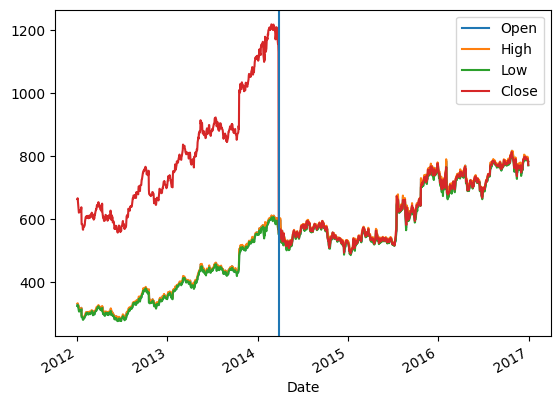

In [12]:
train_df.drop(columns="Volume").plot()
plt.axvline(x="2014-03-30")

(400.0, 900.0)

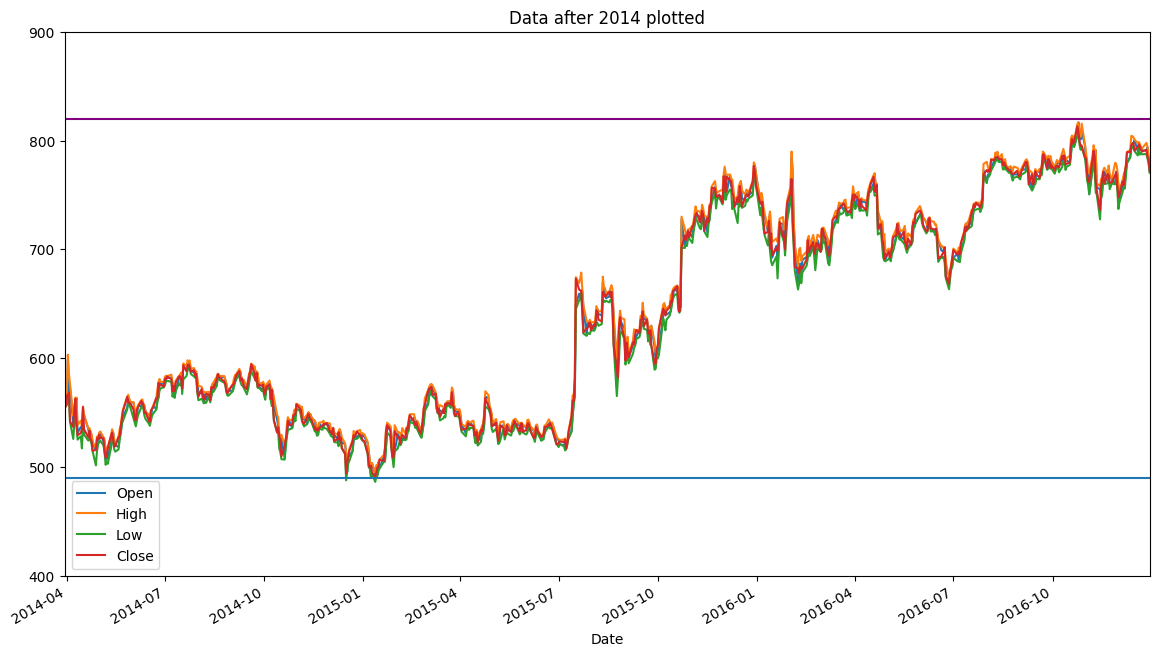

In [13]:
train_df.drop(columns="Volume").plot(xlim=["2014-03-30","2016-12-30"],figsize=(14,8))
plt.title("Data after 2014 plotted")
plt.axhline(y=490)
plt.axhline(y=820,c="purple")
plt.ylim(400,900)

<Axes: title={'center': 'Time series Graph of the Volume'}, xlabel='Date'>

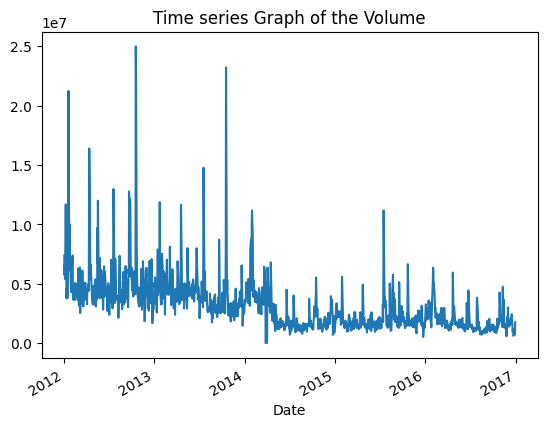

In [14]:
plt.title("Time series Graph of the Volume")
train_df['Volume'].plot()

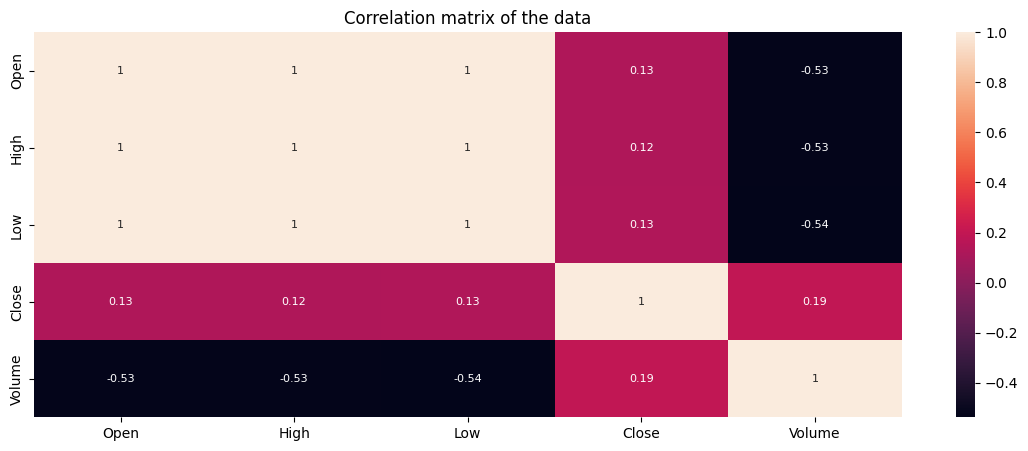

In [15]:
correlation_matrix=train_df.corr()
plt.figure(figsize=(14,5))
sn.heatmap(correlation_matrix,annot=True,annot_kws={"size":8})
plt.title("Correlation matrix of the data")
plt.show()

<Axes: xlabel='Date'>

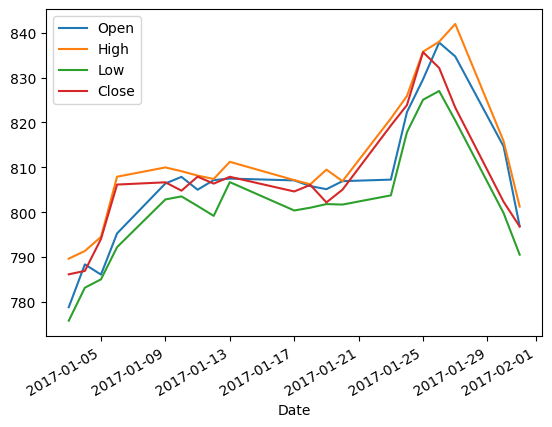

In [16]:
test_df['Date']=pd.to_datetime(test_df['Date'])
test_df.set_index("Date",drop=True,inplace=True)
test_df.drop(columns="Volume").plot()

Text(0.5, 1.0, 'Smoothed bases on Month training data')

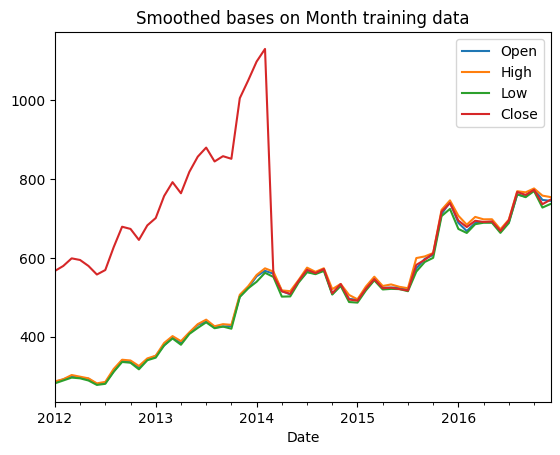

In [17]:
monthly_view=train_df.resample(rule="M").min()
monthly_view.drop(columns="Volume").plot()
plt.title("Smoothed bases on Month training data")

Text(0.5, 1.0, 'Quaterly Trend')

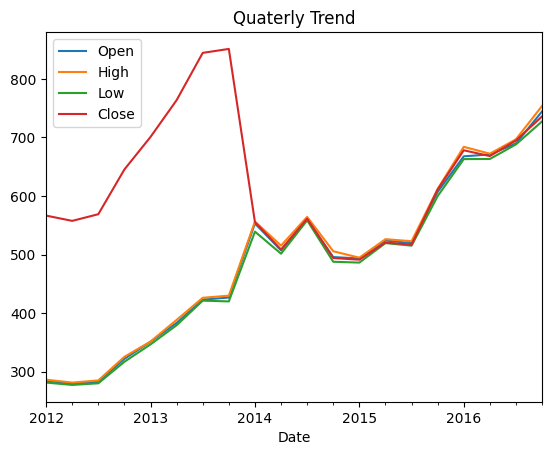

In [18]:
quaterly_view=train_df.resample(rule="QS").min()
quaterly_view.drop(columns="Volume").plot()
plt.title("Quaterly Trend")

Text(0.5, 1.0, 'Business End Trend')

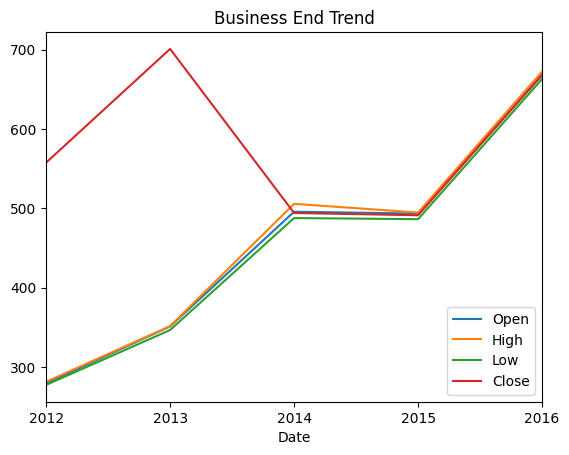

In [19]:
Business_end_view=train_df.resample(rule="BA").min()
Business_end_view.drop(columns="Volume").plot()
plt.title("Business End Trend")

In [20]:
#Inference:
#We will filter out the data after 2014-03-30 reason being the volume being higher 
filtered_df=train_df.loc["2014-03-30":]

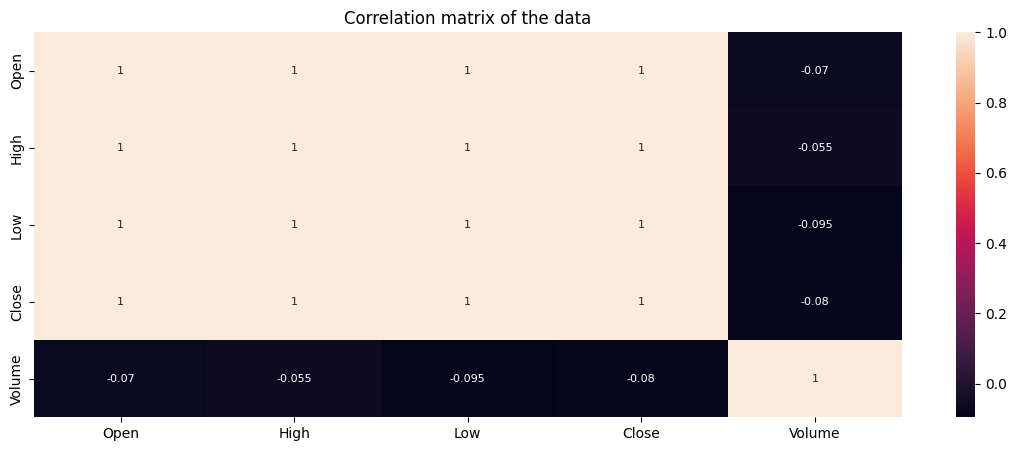

In [21]:
correlation_matrix=filtered_df.corr()
plt.figure(figsize=(14,5))
sn.heatmap(correlation_matrix,annot=True,annot_kws={"size":8})
plt.title("Correlation matrix of the data")
plt.show()

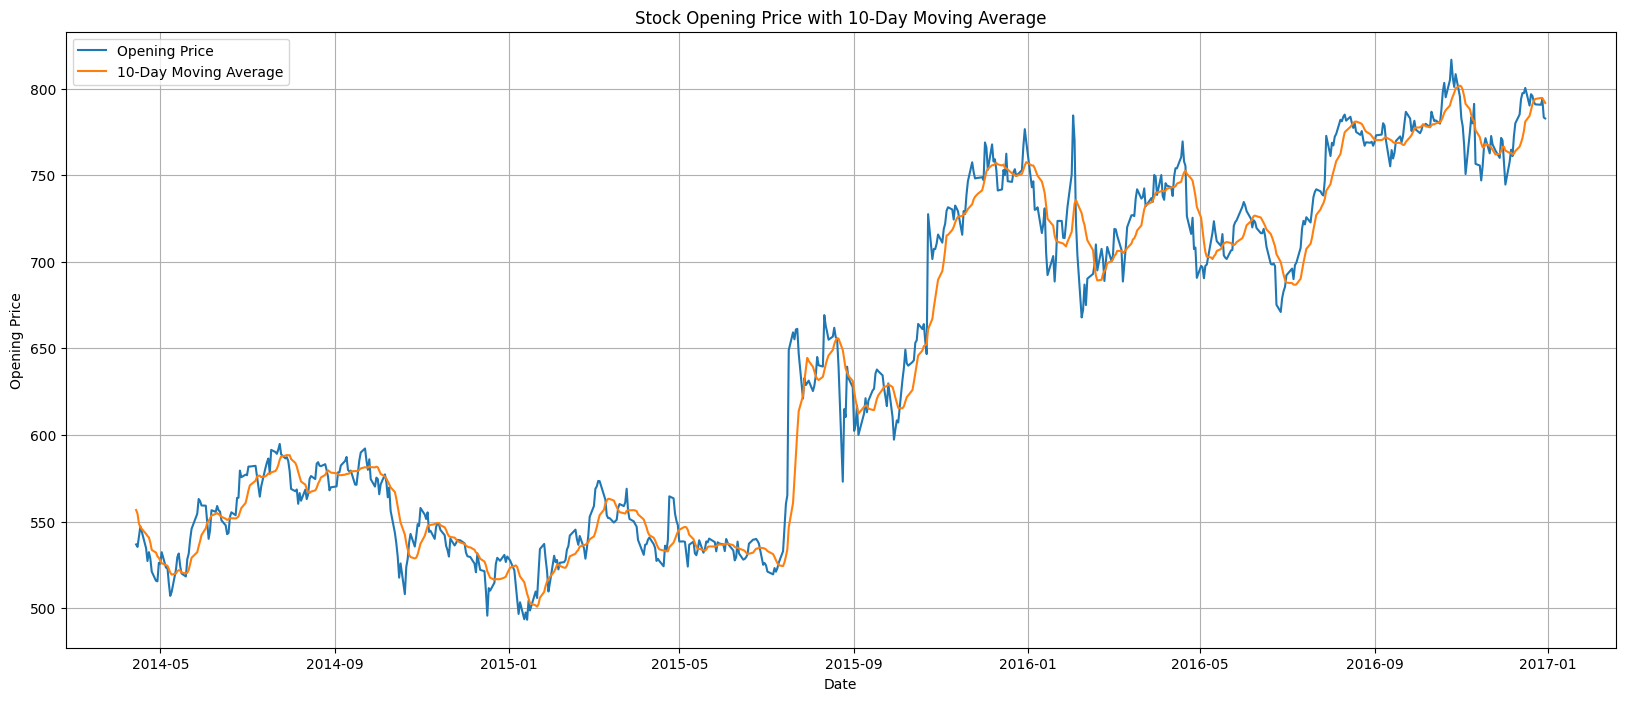

In [22]:

sa_price = filtered_df['Open'].rolling(10).mean()  # Calculate the mean for rolling window

plt.figure(figsize=(20,8))
plt.plot(filtered_df.index[10:],filtered_df['Open'][10:], label='Opening Price')
plt.plot(filtered_df.index[10:],sa_price[10:], label='10-Day Moving Average')

plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Stock Opening Price with 10-Day Moving Average')
plt.legend()
plt.grid(True)

plt.show()

In [23]:
!pip install statsmodels

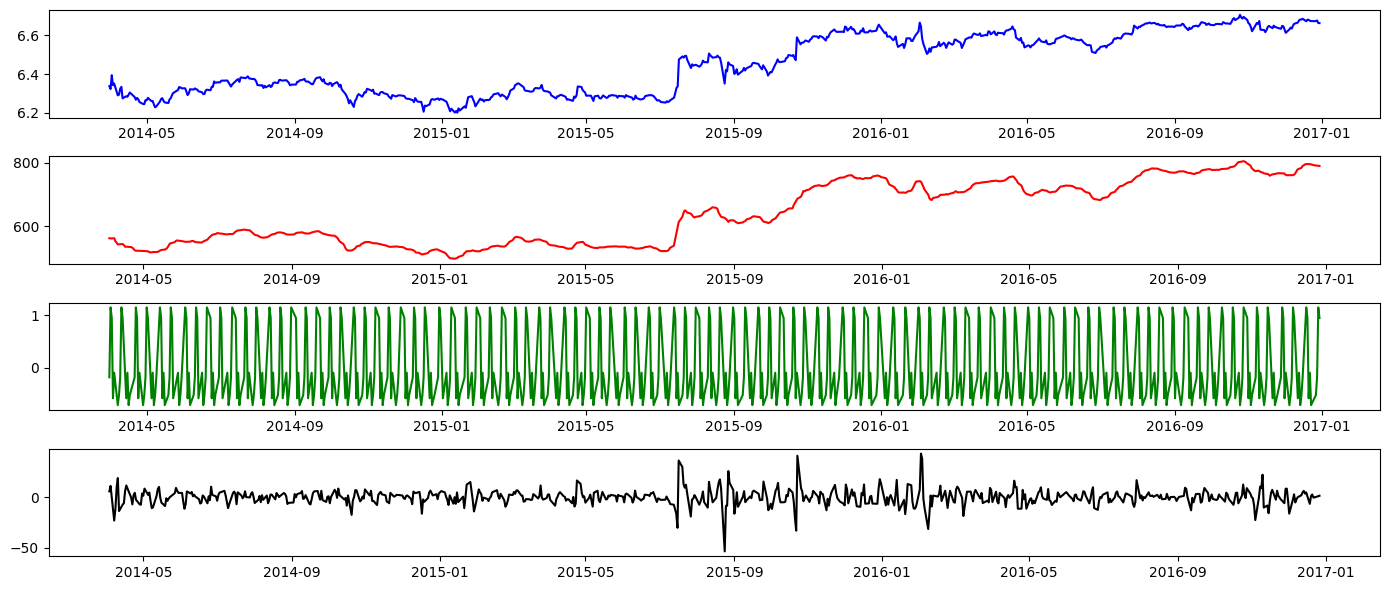

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(filtered_df['Open'],period=7)
trend=decomposition.trend
seasonality=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(14,6))
plt.subplot(411)
plt.plot(np.log(filtered_df['Open']),label="Orginal",color="blue")
plt.subplot(412)
plt.plot(trend,label="trend",color="red")
plt.subplot(413)
plt.plot(seasonality,label="seasonality",color="green")
plt.subplot(414)
plt.plot(residual,label="Residual",color="black")
plt.tight_layout()

In [25]:
filtered_df

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-31,565.34,565.45,555.41,555.45,10800
2014-04-01,557.18,566.89,557.18,565.61,7900
2014-04-02,598.35,603.17,560.65,565.45,147100
2014-04-03,568.29,585.67,562.59,568.18,5099100
2014-04-04,573.08,576.19,541.51,541.65,6369300
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,623400
2016-12-27,790.68,797.86,787.66,791.55,789100
2016-12-28,793.70,794.23,783.20,785.05,1153800


In [26]:
from statsmodels.tsa.api import ExponentialSmoothing
model=ExponentialSmoothing(filtered_df['Open'],trend="additive",seasonal="additive",seasonal_periods=7).fit(smoothing_level=0.4,
                                                                       smoothing_trend=0.6,
                                                                       smoothing_seasonal=0.3,
                                                                       )

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
def mape(actual,predicted):
    return np.mean(abs(actual-predicted)/actual)*100

In [28]:
mape(filtered_df['Open'],model.fittedvalues)

1.8177606785303275

In [29]:
predictions=model.forecast(steps=len(test_df))
preds=pd.DataFrame(predictions)
preds.index=test_df.index
preds

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,0
Date,
2017-01-03,790.17
2017-01-04,783.57
2017-01-05,778.50
2017-01-06,770.17
2017-01-09,764.92
2017-01-10,759.26
2017-01-11,768.37
2017-01-12,765.13
2017-01-13,758.53


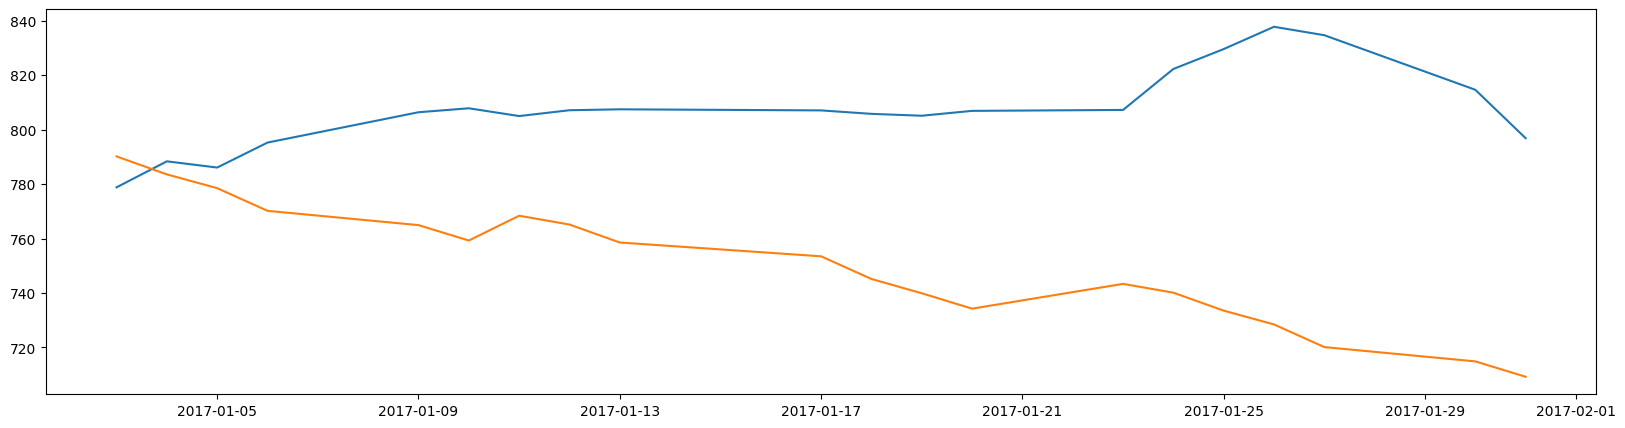

In [30]:
plt.figure(figsize=(20,5))
plt.plot(test_df['Open'])
plt.plot(preds)

## Inferences

1) Till 2014 the volume was significantly higher that made the close price being higher than the intra day high till 2014
    
    * Taking the data from 2014 seems like a good options where by we could avoid the model learning these irregular points or noise

2) There arent any missing values that we need to handle

3) We can oversample or undersample the data using resampling day to hours or day to weeks

# Next EDA Steps
## ARIMA SARIMAX Model 

We are building these time series model to compare with the LSTM model we are going to build

So if the problem statement had asked to predict multiple time dependent features we would use VAT(Vector Auto Regressor) or Multivariate LSTM Encoder - Decoder Model

But for our case we are just going to build simple yet powerful model using LSTM


In [31]:
## Steps: Check Stationarity -> make data stationary -> ACF and PACF ->Building models ->Prdicting and  evaluation

In [32]:
time_series_df=filtered_df[['Open',"Volume"]]

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
def dicky_fuller(series):
    test=adfuller(series)
    df_output=pd.Series(test[0:4],index=['Test Statistic','p_value','#Lags used',"Number of Observations used"])
    for key,value in test[4].items():
        df_output['Critical values (%s)'%key]=value
    if test[1] <=0.05:
        print("P value less than 0.05 enough evidence that this data is stationary and the data has no unit root")
    else:
        print("P val is greater than 0.05 and we conclude that the data is not stationary and the data has a unit root")
    print(df_output)


dicky_fuller(time_series_df['Open'])  

P val is greater than 0.05 and we conclude that the data is not stationary and the data has a unit root
Test Statistic                 -0.88
p_value                         0.79
#Lags used                      5.00
Number of Observations used   690.00
Critical values (1%)           -3.44
Critical values (5%)           -2.87
Critical values (10%)          -2.57
dtype: float64


In [35]:
#MAking data stationary using the differencing method
time_series_df['d_1']=time_series_df['Open']-time_series_df['Open'].shift(1)

In [36]:
dicky_fuller(time_series_df['d_1'].dropna())

P value less than 0.05 enough evidence that this data is stationary and the data has no unit root
Test Statistic                -13.41
p_value                         0.00
#Lags used                      4.00
Number of Observations used   690.00
Critical values (1%)           -3.44
Critical values (5%)           -2.87
Critical values (10%)          -2.57
dtype: float64


In [37]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
#Acf for finding value of q and PACF for finding value of p and here we done 1 differencing so we will use 1 as d

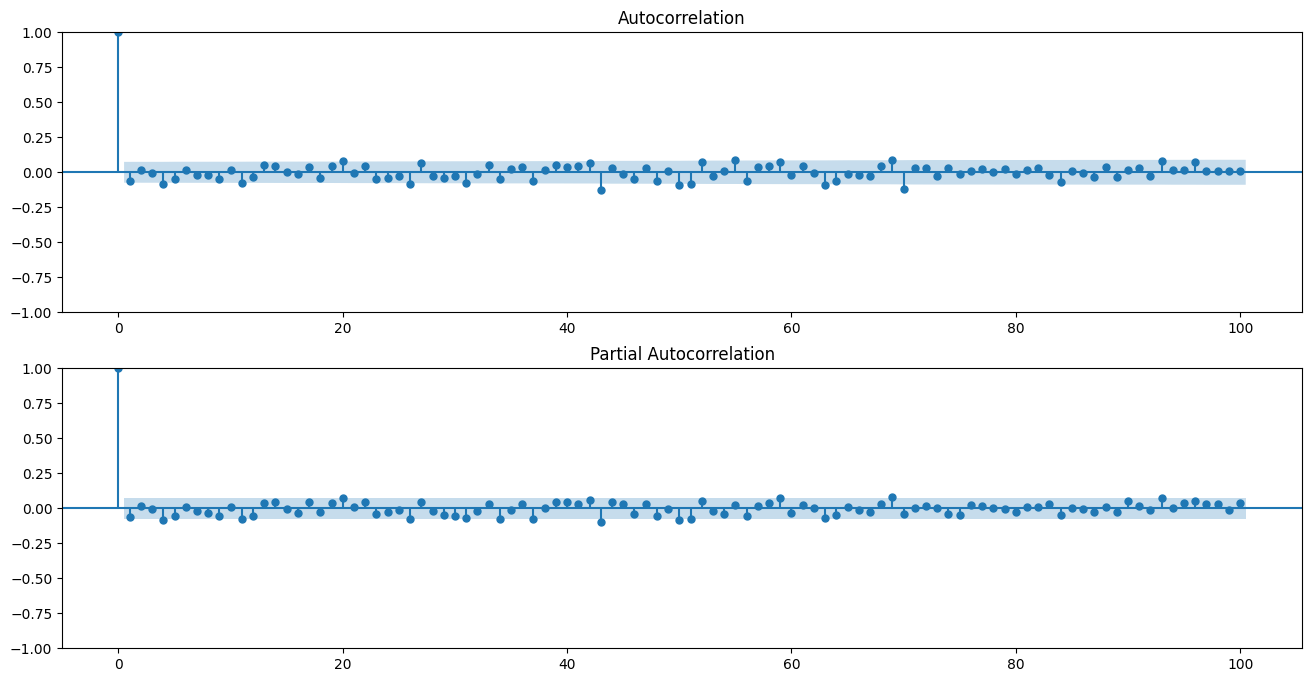

In [38]:

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(time_series_df['d_1'].dropna(), lags=100, ax=ax[0])
plot_pacf(time_series_df['d_1'].dropna(), lags=100, ax=ax[1])

plt.show()

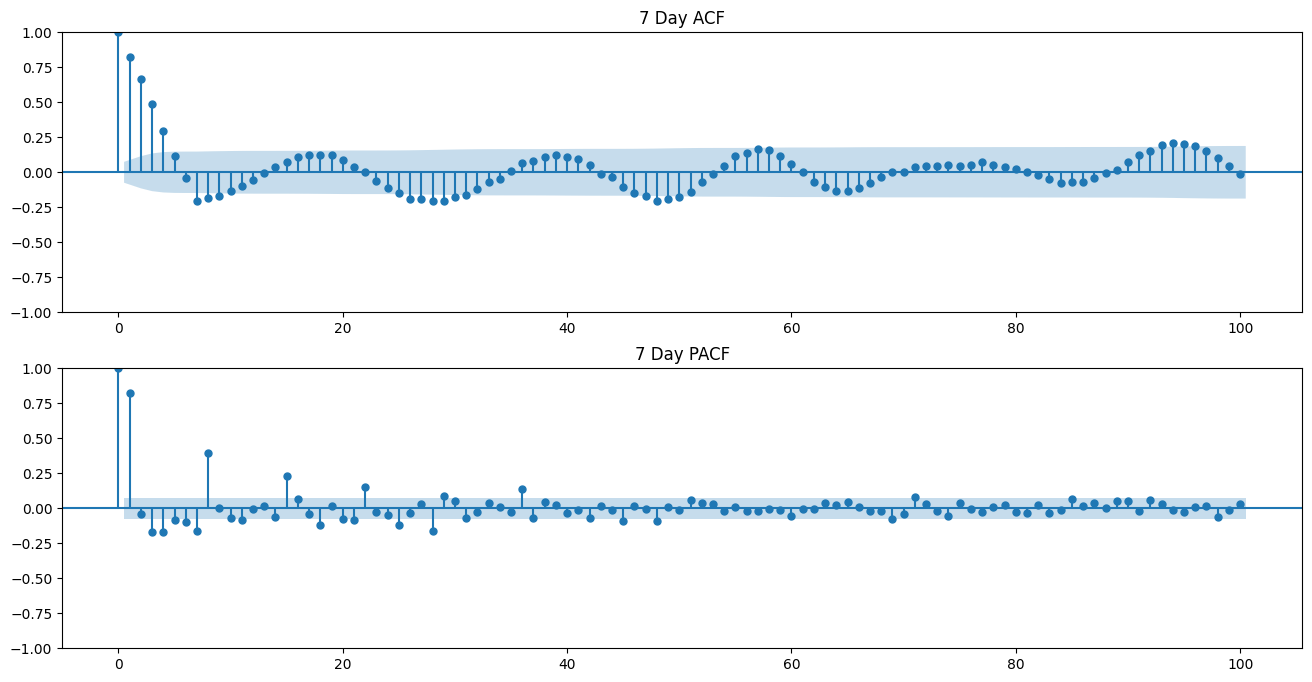

In [58]:

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(time_series_df['d7_1'].dropna(), lags=100, ax=ax[0],title="7 Day ACF")
plot_pacf(time_series_df['d7_1'].dropna(), lags=100, ax=ax[1],title="7 Day PACF")

plt.show()

In [137]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime,timedelta

In [88]:
train_data_end=datetime(2016,8,16)
test_data_end=datetime(2016,12,30)

In [89]:
train_data=time_series_df[:train_data_end]
test_data=time_series_df[train_data_end+timedelta(days=1):test_data_end]

In [145]:
arima=ARIMA(endog=time_series_df['Open'],order=(0,1,0),exog=time_series_df['Volume'])
arima_model=arima.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [146]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  696
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4528.482
Date:                Thu, 13 Jun 2024   AIC                           9060.964
Time:                        06:56:39   BIC                           9070.052
Sample:                             0   HQIC                          9064.478
                                - 696                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      1.347e-06      0.000      0.012      0.991      -0.000       0.000
sigma2      7.257e+04   5.93e-15   1.22e+19      0.000    7.26e+04    7.26e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.82   Jarque-Bera (JB):              4870.93
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.56
Prob(H) (two-sided):                  0.03   Kurtosis:                        15.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+36. Standard errors may be unstable.
"""

In [149]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

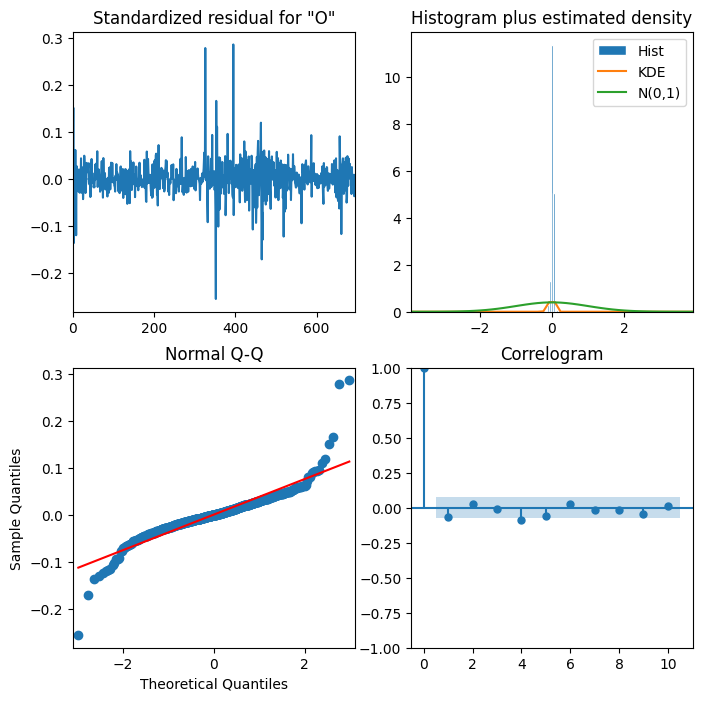

In [150]:
daigs=arima_model.plot_diagnostics(figsize=(8,8))

In [152]:
arime_pred=arima_model.predict(start=pred_start_date,end=pred_end_date)

<Axes: ylabel='Density'>

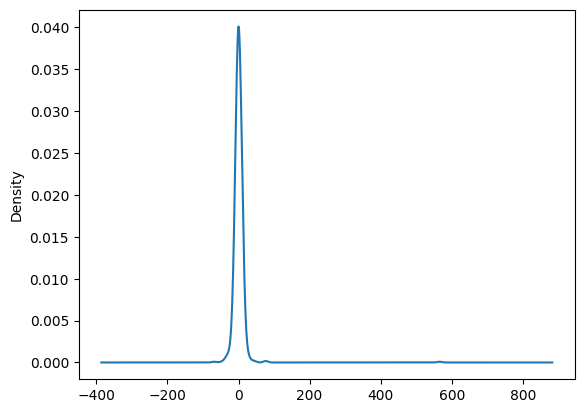

In [153]:
arima_model.resid.plot(kind="kde")

In [154]:
test_data["Arima_preds"]=arime_pred

<Axes: xlabel='Date'>

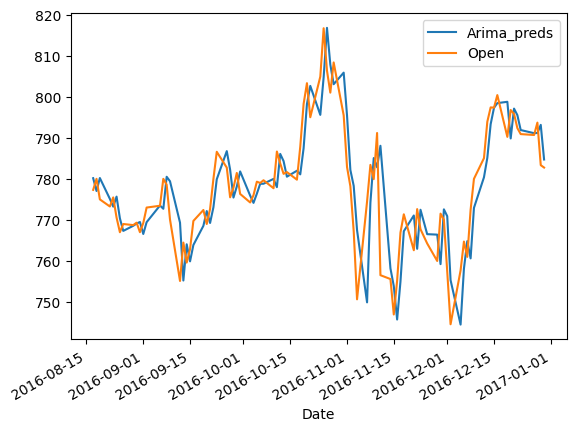

In [155]:
test_data[["Arima_preds","Open"]].plot()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'